In [1]:
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

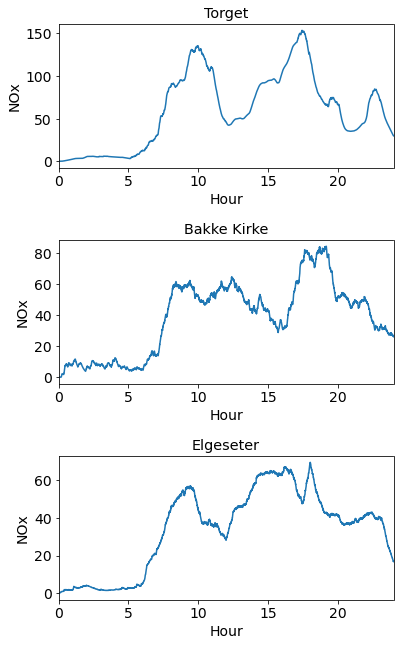

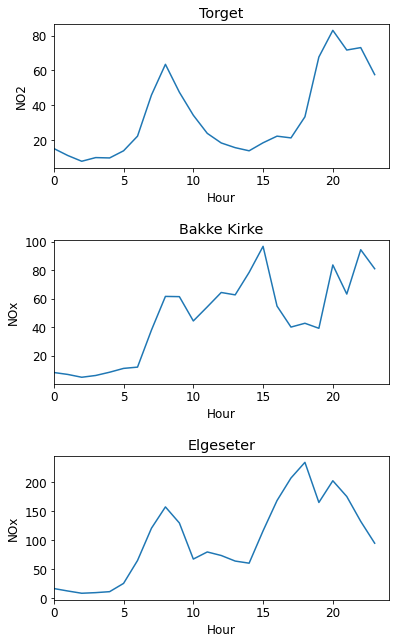

In [40]:
data = pd.read_csv('../outputs/small_extended/backups/1/emissions.csv', delimiter=',', engine='python')
#data = pd.read_csv('../outputs/2020-04-17 15:51:45.231760/simulations/2020-04-17 15:51:45.231871/emissions.csv', delimiter=',', engine='python')

#############
#Map small
#Torget - poly_79
#############
#Map small_extended
##
#with 200 x 200 cells
#Torget - poly_125
#Bakke kirke - poly_174
#Elgeseter - poly_120 (+-)
##
#with 100 x 100 cells
#Torget - poly_490
#Bakke kirke - poly_685
#Elgeseter - poly_504 (+-)
#############
#Map main
#Torget - poly_458
#Bakke kirke - poly_603
#Elgeseter - poly_488
#E6 Tiller - 

torvet_poly = 'poly_490'
bakke_kirke_poly = 'poly_685'
elgeseter_poly = 'poly_504'

simul_torget = data[data.Cell == torvet_poly]

simul_bakke_kirke = data[data.Cell == bakke_kirke_poly]

simul_elgeseter = data[data.Cell == elgeseter_poly]

############
##Fetch real measurements
inputFile = open('real_pollution_data/torvet_2502_no2.json')
data = json.load(inputFile) 
real_torvet = np.zeros(len(data[0]['values']))

for i in range(len(data[0]['values'])):
    real_torvet[i] = data[0]['values'][i]['value']
    
    
inputFile = open('real_pollution_data/bakke_kirke_2502_nox.json')
data = json.load(inputFile) 
real_bakke = np.zeros(len(data[0]['values']))

for i in range(len(data[0]['values'])):
    real_bakke[i] = data[0]['values'][i]['value']    


inputFile = open('real_pollution_data/elgeseter_2502_nox.json')
data = json.load(inputFile) 
real_elgeseter = np.zeros(len(data[0]['values']))

for i in range(len(data[0]['values'])):
    real_elgeseter[i] = data[0]['values'][i]['value']
    
    
#Draw plots of simulation
fig, axs = plt.subplots(3,1)

plt.rcParams.update({'font.size': 12})

axs[0].plot(simul_torget.Timestep/3600,simul_torget.NOx)
axs[0].set(xlabel='Hour', ylabel='NOx')
axs[0].set_title('Torget')
axs[0].set_xlim(0,24)

axs[1].plot(simul_bakke_kirke.Timestep/3600,simul_bakke_kirke.NOx)
axs[1].set(xlabel='Hour', ylabel='NOx')
axs[1].set_title('Bakke Kirke')
axs[1].set_xlim(0,24)

axs[2].plot(simul_elgeseter.Timestep/3600,simul_elgeseter.NOx)
axs[2].set(xlabel='Hour', ylabel='NOx')
axs[2].set_title('Elgeseter')
axs[2].set_xlim(0,24)

plt.subplots_adjust(left=None, bottom=-0.5, right=None, top=1.5, wspace=None, hspace=0.5)

plt.savefig('figs/simul_pollution.pdf',format='pdf',bbox_inches='tight')

#############################################
#Draw plots of real measurements

fig, axs = plt.subplots(3,1)

axs[0].plot(real_torvet)
#ax1.xticks(np.arange(len(no2)))
axs[0].set(xlabel='Hour', ylabel='NO2')
axs[0].set_title('Torget')
axs[0].set_xlim(0,24)

######
 
axs[1].plot(real_bakke)
axs[1].set(xlabel='Hour', ylabel='NOx')
axs[1].set_title('Bakke Kirke')
axs[1].set_xlim(0,24)

#####
   
axs[2].plot(real_elgeseter)
#ax3.xticks(np.arange(len(nox)))
axs[2].set(xlabel='Hour', ylabel='NOx')
axs[2].set_title('Elgeseter')
axs[2].set_xlim(0,24)

plt.subplots_adjust(left=None, bottom=-0.5, right=None, top=1.5, wspace=None, hspace=0.5)

fig.savefig('figs/real_pollution.pdf',format='pdf',bbox_inches='tight')

#Subplots_adjust defaults
# left = 0.125  # the left side of the subplots of the figure
# right = 0.9   # the right side of the subplots of the figure
# bottom = 0.1  # the bottom of the subplots of the figure
# top = 0.9     # the top of the subplots of the figure
# wspace = 0.2  # the amount of width reserved for space between subplots,
#               # expressed as a fraction of the average axis width
# hspace = 0.2  # the amount of height reserved for space between subplots,
#               # expressed as a fraction of the average axis height

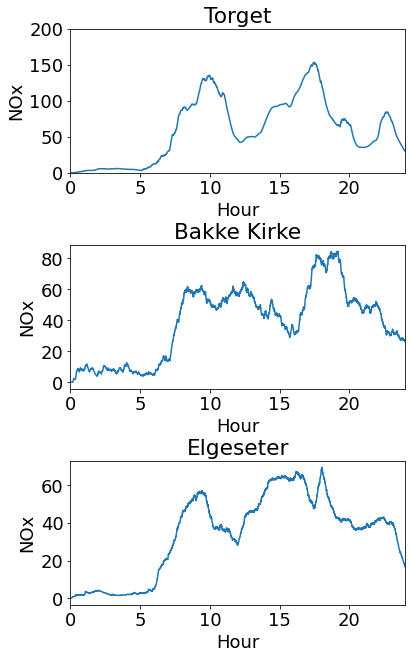

In [39]:
plt.figure()

plt.subplot(311)

plt.plot(simul_torget.Timestep/3600,simul_torget.NOx)
plt.xlabel('Hour'); plt.ylabel('NOx')
plt.title('Torget')
plt.xlim(0,24)
plt.ylim(0,200)

plt.subplot(312)

plt.plot(simul_bakke_kirke.Timestep/3600,simul_bakke_kirke.NOx)
plt.xlabel('Hour'); plt.ylabel('NOx')
plt.title('Bakke Kirke')
plt.xlim(0,24)

plt.subplot(313)

plt.plot(simul_elgeseter.Timestep/3600,simul_elgeseter.NOx)
plt.xlabel('Hour'); plt.ylabel('NOx')
plt.title('Elgeseter')
plt.xlim(0,24)

plt.subplots_adjust(left=None, bottom=-0.5, right=None, top=1.5, wspace=None, hspace=0.5)
#plt.tight_layout()

plt.rcParams.update({'font.size': 14})

plt.savefig('figs/test.png',bbox_inches='tight')